**1)**

Enter x data points separated by commas: 11, 22.5, 33.7, 54, 77
Enter y data points separated by commas: 1.4, 12.8, 28.9, 31, 44.5
Enter e values separated by commas (use 0 or 1): 1, 1, 1, 1


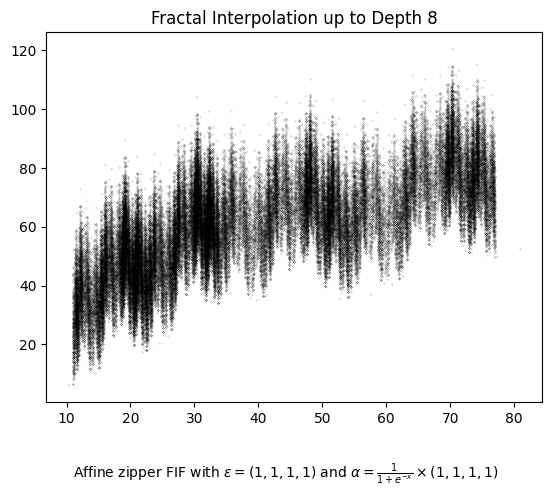

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define alpha functions
def alpha0(x): return 1 / (1 + np.exp(-x))
def alpha1(x): return 1 / (1 + np.exp(-x))
def alpha2(x): return 1 / (1 + np.exp(-x))
def alpha3(x): return 1 / (1 + np.exp(-x))

def get_data_points():
    x = input("Enter x data points separated by commas: ")
    y = input("Enter y data points separated by commas: ")

    x = list(map(float, x.split(',')))
    y = list(map(float, y.split(',')))

    return x, y

# Get data points from the user
x, y = get_data_points()


def get_e_values():
    e = input("Enter e values separated by commas (use 0 or 1): ")
    e = list(map(int, e.split(',')))
    return e

# Get e values from the user
e = get_e_values()
alpha = [alpha0, alpha1, alpha2, alpha3]
c = []
d = []
n = len(x) - 1

# Calculate d and c values
for i in range(n):
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha[i](x[n]) * y[n])) -
              (x[n] * (y[i + e[i]] - alpha[i](x[0]) * y[0]))) /
             (x[0] - x[n]))

    c.append(((y[i + 1 - e[i]] - alpha[i](x[n]) * y[n]) -
              (y[i + e[i]] - alpha[i](x[0]) * y[0])) /
             (x[n] - x[0]))

a = []
b = []

# Calculate a and b values
for i in range(n):
    a.append((x[i + 1 - e[i]] - x[i + e[i]]) / (x[n] - x[0]))
    b.append((x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / (x[n] - x[0]))

# Define transformations as functions in a list
transformations = []

for i in range(n):
    def wi(x, y, i=i):
        return [a[i] * x + b[i],alpha[i](x) * y + c[i] * x + d[i]]
    transformations.append(wi)


def generate_points(x0, y0, max_depth):
    current_points = [(x0, y0)]
    for depth in range(max_depth):
        new_points = []
        for (x, y) in current_points:
            for transform in transformations:
                new_x, new_y = transform(x, y)
                points_x.append(new_x)
                points_y.append(new_y)
                new_points.append((new_x, new_y))
        current_points = new_points
max_depth = 8
points_x = []
points_y = []
initial_x, initial_y = 0, 0


generate_points(initial_x, initial_y, max_depth)


plt.figure()
plt.scatter(points_x, points_y, s=0.01, color="black")
plt.title(f"Fractal Interpolation up to Depth {max_depth}")
plt.figtext(0.5, -0.05, r"Affine zipper FIF with $\epsilon = (1, 1, 1, 1)$ and $\alpha = \frac{1}{1 + e^{-x}} \times (1, 1, 1, 1)$",ha="center", fontsize=10)
plt.show()


#x = [11, 22.5, 33.7, 54, 77]
#y = [1.4, 12.8, 28.9, 31, 44.5]



**2)**

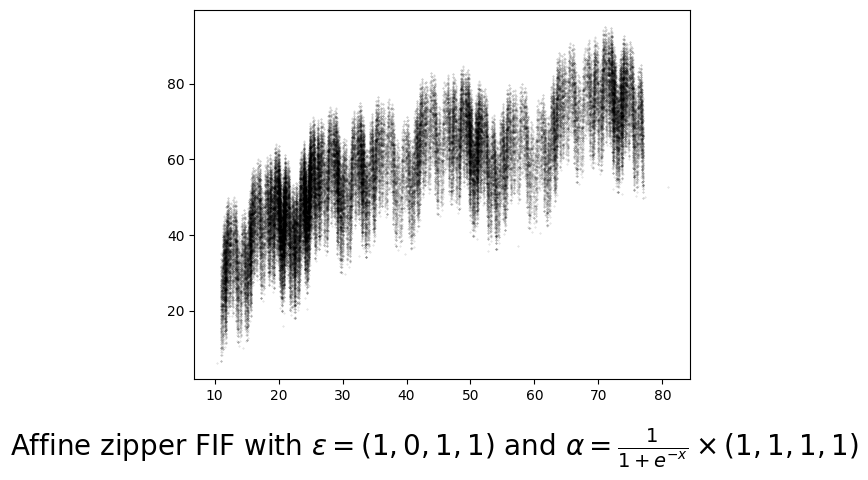

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define alpha functions
def alpha0(x): return 1 / (1 + np.exp(-x))
def alpha1(x): return 1 / (1 + np.exp(-x))
def alpha2(x): return 1 / (1 + np.exp(-x))
def alpha3(x): return 1 / (1 + np.exp(-x))

# Data
x = [11, 22.5, 33.7, 54, 77]
y = [1.4, 12.8, 28.9, 31, 44.5]
e = [1, 0, 1, 1]
alpha = [alpha0, alpha1, alpha2, alpha3]
c = []
d = []
n = len(x)-1

# Calculate d and c values
for i in range(n):
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha[i](x[n]) * y[n])) -
              (x[n] * (y[i + e[i]] - alpha[i](x[0]) * y[0]))) /
             (x[0] - x[n]))

    c.append(((y[i + 1 - e[i]] - alpha[i](x[n]) * y[n]) -
              (y[i + e[i]] - alpha[i](x[0]) * y[0])) /
             (x[n] - x[0]))

a = []
b = []

# Calculate a and b values
for i in range(n):
    a.append((x[i+1-e[i]] - x[i+e[i]]) / (x[n] - x[0]))
    b.append((x[n] * x[i+e[i]] - x[0] * x[i+1-e[i]]) / (x[n] - x[0]))

# Define transformations as functions in a list
transformations = []

for i in range(n):
    def wi(x, y, i=i):  # Use default argument i=i to capture the current i value
        return [
            a[i] * x + b[i],
            alpha[i](x) * y + c[i] * x + d[i]
        ]
    transformations.append(wi)

# Function to generate points at each depth level
def generate_points(x, y, max_depth):
    points = [(x, y)]  # Start with the initial point
    all_points_x = []
    all_points_y = []

    for depth in range(max_depth):
        new_points = []
        for (px, py) in points:
            for transform in transformations:
                new_x, new_y = transform(px, py)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        points = new_points  # Update points for the next depth level

    return all_points_x, all_points_y

# Initialize parameters
max_depth = 8     # Adjust depth for desired detail level
initial_x, initial_y = 0, 0  # Starting point

# Generate points
points_x, points_y = generate_points(initial_x, initial_y, max_depth)

# Plot the points with smaller size and transparency
plt.figure()
plt.scatter(points_x, points_y, s=0.1, alpha=0.2, color="black")  # Smaller points, more transparency

# Add an empty title to maintain spacing at the top
plt.title("")

# Display title below the plot using plt.figtext
plt.figtext(0.5, -0.05, r"Affine zipper FIF with $\epsilon = (1, 0, 1, 1)$ and $\alpha = \frac{1}{1 + e^{-x}} \times (1, 1, 1, 1)$",
            ha="center", fontsize=20)

plt.show()



**3)**

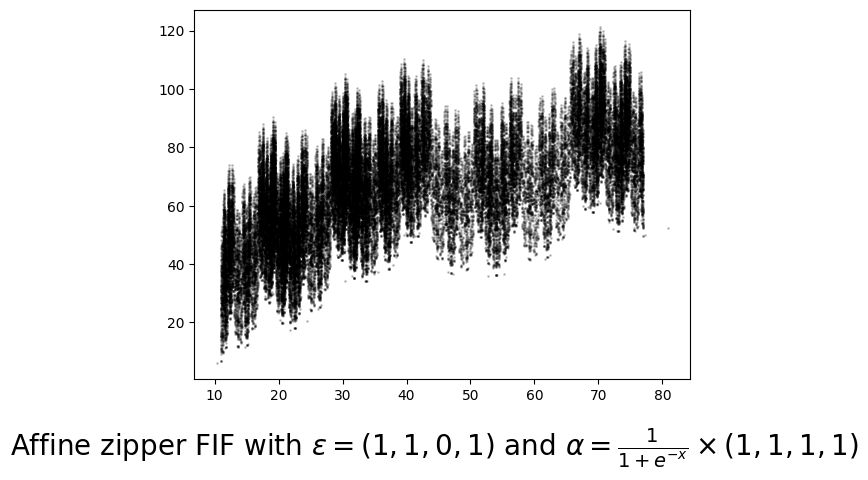

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define alpha functions
def alpha0(x): return 1 / (1 + np.exp(-x))
def alpha1(x): return 1 / (1 + np.exp(-x))
def alpha2(x): return 1 / (1 + np.exp(-x))
def alpha3(x): return 1 / (1 + np.exp(-x))

# Data
x = [11, 22.5, 33.7, 54, 77]
y = [1.4, 12.8, 28.9, 31, 44.5]
e = [1, 1, 0, 1]
alpha = [alpha0, alpha1, alpha2, alpha3]
c = []
d = []
n = len(x)-1

# Calculate d and c values
for i in range(n):
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha[i](x[n]) * y[n])) -
              (x[n] * (y[i + e[i]] - alpha[i](x[0]) * y[0]))) /
             (x[0] - x[n]))

    c.append(((y[i + 1 - e[i]] - alpha[i](x[n]) * y[n]) -
              (y[i + e[i]] - alpha[i](x[0]) * y[0])) /
             (x[n] - x[0]))

a = []
b = []

# Calculate a and b values
for i in range(n):
    a.append((x[i+1-e[i]] - x[i+e[i]]) / (x[n] - x[0]))
    b.append((x[n] * x[i+e[i]] - x[0] * x[i+1-e[i]]) / (x[n] - x[0]))

# Define transformations as functions in a list
transformations = []

for i in range(n):
    def wi(x, y, i=i):  # Use default argument i=i to capture the current i value
        return [
            a[i] * x + b[i],
            alpha[i](x) * y + c[i] * x + d[i]
        ]
    transformations.append(wi)

# Function to generate points at each depth level
def generate_points(x, y, max_depth):
    points = [(x, y)]  # Start with the initial point
    all_points_x = []
    all_points_y = []

    for depth in range(max_depth):
        new_points = []
        for (px, py) in points:
            for transform in transformations:
                new_x, new_y = transform(px, py)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        points = new_points  # Update points for the next depth level

    return all_points_x, all_points_y

# Initialize parameters
max_depth = 8     # Adjust depth for desired detail level
initial_x, initial_y = 0, 0  # Starting point

# Generate points
points_x, points_y = generate_points(initial_x, initial_y, max_depth)

# Plot the points with smaller size and transparency
plt.figure()
plt.scatter(points_x, points_y, s=1, alpha=0.2, color="black")  # Smaller points, more transparency

# Add an empty title to maintain spacing at the top
plt.title("")

# Display title below the plot using plt.figtext
plt.figtext(0.5, -0.05, r"Affine zipper FIF with $\epsilon = (1, 1, 0, 1)$ and $\alpha = \frac{1}{1 + e^{-x}} \times (1, 1, 1, 1)$",
            ha="center", fontsize=20)

plt.show()



**4)**

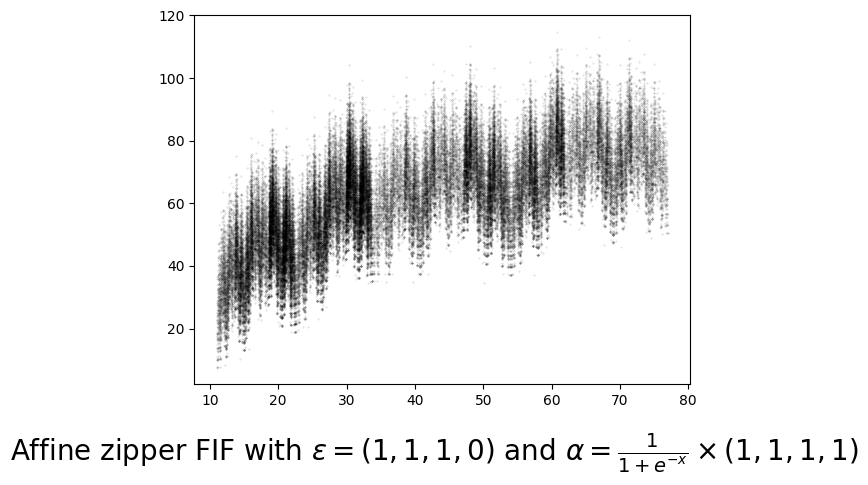

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define alpha functions
def alpha0(x): return 1 / (1 + np.exp(-x))
def alpha1(x): return 1 / (1 + np.exp(-x))
def alpha2(x): return 1 / (1 + np.exp(-x))
def alpha3(x): return 1 / (1 + np.exp(-x))

# Data
x = [11, 22.5, 33.7, 54, 77]
y = [1.4, 12.8, 28.9, 31, 44.5]
e = [1, 1, 1, 0]
alpha = [alpha0, alpha1, alpha2, alpha3]
c = []
d = []
n = len(x)-1

# Calculate d and c values
for i in range(n):
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha[i](x[n]) * y[n])) -
              (x[n] * (y[i + e[i]] - alpha[i](x[0]) * y[0]))) /
             (x[0] - x[n]))

    c.append(((y[i + 1 - e[i]] - alpha[i](x[n]) * y[n]) -
              (y[i + e[i]] - alpha[i](x[0]) * y[0])) /
             (x[n] - x[0]))

a = []
b = []

# Calculate a and b values
for i in range(n):
    a.append((x[i+1-e[i]] - x[i+e[i]]) / (x[n] - x[0]))
    b.append((x[n] * x[i+e[i]] - x[0] * x[i+1-e[i]]) / (x[n] - x[0]))

# Define transformations as functions in a list
transformations = []

for i in range(n):
    def wi(x, y, i=i):  # Use default argument i=i to capture the current i value
        return [
            a[i] * x + b[i],
            alpha[i](x) * y + c[i] * x + d[i]
        ]
    transformations.append(wi)

# Function to generate points at each depth level
def generate_points(x, y, max_depth):
    points = [(x, y)]  # Start with the initial point
    all_points_x = []
    all_points_y = []

    for depth in range(max_depth):
        new_points = []
        for (px, py) in points:
            for transform in transformations:
                new_x, new_y = transform(px, py)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        points = new_points  # Update points for the next depth level

    return all_points_x, all_points_y

# Initialize parameters
max_depth = 8     # Adjust depth for desired detail level
initial_x, initial_y = 0, 0  # Starting point

# Generate points
points_x, points_y = generate_points(initial_x, initial_y, max_depth)

# Plot the points with smaller size and transparency
plt.figure()
plt.scatter(points_x, points_y, s=0.1, alpha=0.2, color="black")  # Smaller points, more transparency

# Add an empty title to maintain spacing at the top
plt.title("")

# Display title below the plot using plt.figtext
plt.figtext(0.5, -0.05, r"Affine zipper FIF with $\epsilon = (1, 1, 1, 0)$ and $\alpha = \frac{1}{1 + e^{-x}} \times (1, 1, 1, 1)$",
            ha="center", fontsize=20)

plt.show()



**5)**

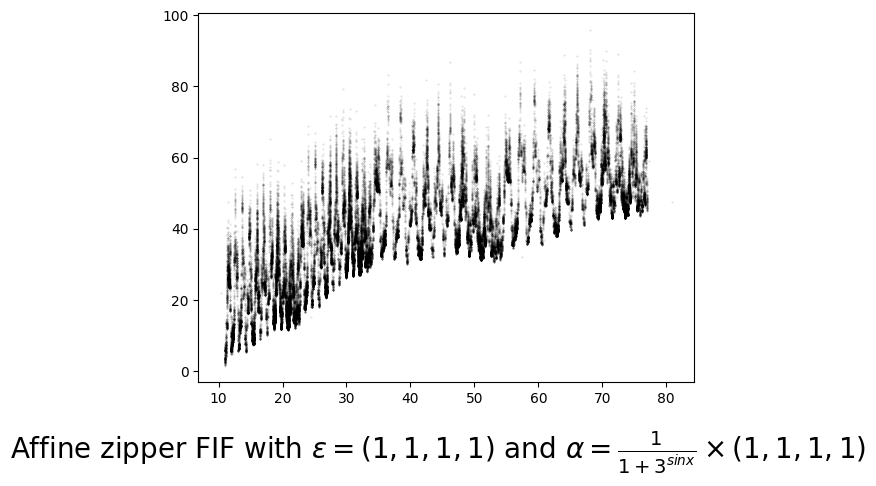

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define alpha functions
def alpha0(x): return 1 / (1 + 3 ** np.sin(x))
def alpha1(x): return 1 / (1 + 3 ** np.sin(x))
def alpha2(x): return 1 / (1 + 3 ** np.sin(x))
def alpha3(x): return 1 / (1 + 3 ** np.sin(x))

# Data
x = [11, 22.5, 33.7, 54, 77]
y = [1.4, 12.8, 28.9, 31, 44.5]
e = [1, 1, 1, 1]
alpha = [alpha0, alpha1, alpha2, alpha3]
c = []
d = []
n = len(x) - 1

# Calculate d and c values
for i in range(n):
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha[i](x[n]) * y[n])) -
              (x[n] * (y[i + e[i]] - alpha[i](x[0]) * y[0]))) /
             (x[0] - x[n]))

    c.append(((y[i + 1 - e[i]] - alpha[i](x[n]) * y[n]) -
              (y[i + e[i]] - alpha[i](x[0]) * y[0])) /
             (x[n] - x[0]))

a = []
b = []

# Calculate a and b values
for i in range(n):
    a.append((x[i + 1 - e[i]] - x[i + e[i]]) / (x[n] - x[0]))
    b.append((x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / (x[n] - x[0]))

# Define transformations as functions in a list
transformations = []

for i in range(n):
    def wi(x, y, i=i):  # Use default argument i=i to capture the current i value
        return [
            a[i] * x + b[i],
            alpha[i](x) * y + c[i] * x + d[i]
        ]
    transformations.append(wi)

# Function to generate points at each depth level
def generate_points(x, y, max_depth):
    points = [(x, y)]  # Start with the initial point
    all_points_x = []
    all_points_y = []

    for depth in range(max_depth):
        new_points = []
        for (px, py) in points:
            for transform in transformations:
                new_x, new_y = transform(px, py)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        points = new_points  # Update points for the next depth level

    return all_points_x, all_points_y

# Initialize parameters
max_depth = 8       # Adjust depth for desired detail level
initial_x, initial_y = 0, 0  # Starting point

# Generate points
points_x, points_y = generate_points(initial_x, initial_y, max_depth)

# Plot the points with smaller size and transparency
plt.figure()
plt.scatter(points_x, points_y, s=0.1, alpha=0.2, color="black")  # Smaller points, more transparency
plt.title("")

# Display title below the plot using plt.figtext
plt.figtext(0.5, -0.05, r"Affine zipper FIF with $\epsilon = (1, 1, 1, 1)$ and $\alpha = \frac{1}{1 + 3^{sin x}} \times (1, 1, 1, 1)$",
            ha="center", fontsize=20)

plt.show()


**6)**

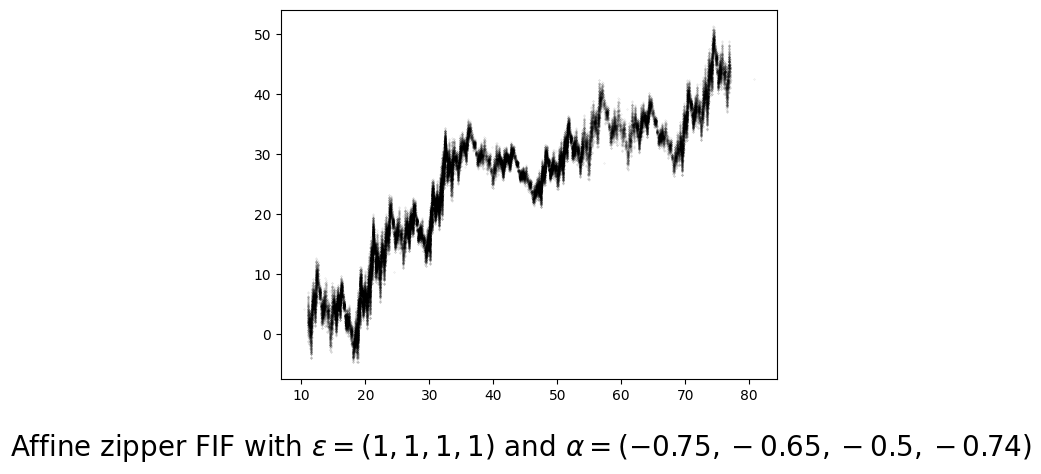

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define alpha functions with constant values
def alpha0(x): return -0.75
def alpha1(x): return -0.65
def alpha2(x): return -0.5
def alpha3(x): return -0.74

# Data points and parameters
x = [11, 22.5, 33.7, 54, 77]
y = [1.4, 12.8, 28.9, 31, 44.5]
e = [1, 1, 1, 1]
alpha = [alpha0, alpha1, alpha2, alpha3]
c, d = [], []  # Initialize coefficient lists
n = len(x) - 1

# Calculate d and c values for transformations
for i in range(n):
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha[i](x[n]) * y[n])) -
              (x[n] * (y[i + e[i]] - alpha[i](x[0]) * y[0]))) / (x[0] - x[n]))
    c.append(((y[i + 1 - e[i]] - alpha[i](x[n]) * y[n]) -
              (y[i + e[i]] - alpha[i](x[0]) * y[0])) / (x[n] - x[0]))

a, b = [], []

# Calculate a and b values for transformations
for i in range(n):
    a.append((x[i + 1 - e[i]] - x[i + e[i]]) / (x[n] - x[0]))
    b.append((x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / (x[n] - x[0]))

# Define transformations as functions in a list
transformations = [
    lambda x, y, i=i: [a[i] * x + b[i], alpha[i](x) * y + c[i] * x + d[i]]
    for i in range(n)
]

# Iterative function to generate points at each depth level
def generate_points(x0, y0, max_depth):
    points = [(x0, y0)]  # Start with the initial point
    all_points_x = []
    all_points_y = []

    for depth in range(max_depth):
        new_points = []
        for (px, py) in points:
            for transform in transformations:
                new_x, new_y = transform(px, py)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        points = new_points  # Update points for the next depth level

    return all_points_x, all_points_y

# Initialize parameters
max_depth = 8       # Depth level
initial_x, initial_y = 0, 0  # Starting point

# Generate points
points_x, points_y = generate_points(initial_x, initial_y, max_depth)

# Plot points with reduced size and transparency
plt.figure()
plt.scatter(points_x, points_y, s=0.05, color="black", alpha=0.2)
plt.title("")

# Display title below the plot using plt.figtext
plt.figtext(0.5, -0.05, r"Affine zipper FIF with $\epsilon = (1, 1, 1, 1)$ and $\alpha =(-0.75, -0.65, -0.5, -0.74)$",
            ha="center", fontsize=20)

plt.show()


**7)**

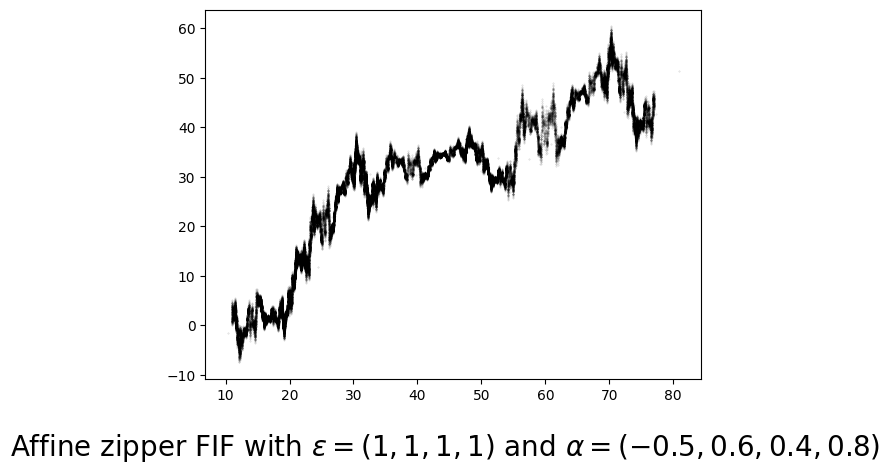

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define alpha functions with different constants
def alpha0(x): return -0.5
def alpha1(x): return 0.6
def alpha2(x): return 0.4
def alpha3(x): return 0.8

# Data initialization
x = [11, 22.5, 33.7, 54, 77]
y = [1.4, 12.8, 28.9, 31, 44.5]
e = [1, 1, 1, 1]
alpha = [alpha0, alpha1, alpha2, alpha3]
c, d = [], []  # Coefficients for transformations
n = len(x) - 1

# Calculate d and c values for transformations
for i in range(n):
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha[i](x[n]) * y[n])) -
              (x[n] * (y[i + e[i]] - alpha[i](x[0]) * y[0]))) / (x[0] - x[n]))
    c.append(((y[i + 1 - e[i]] - alpha[i](x[n]) * y[n]) -
              (y[i + e[i]] - alpha[i](x[0]) * y[0])) / (x[n] - x[0]))

a, b = [], []

# Calculate a and b values for transformations
for i in range(n):
    a.append((x[i + 1 - e[i]] - x[i + e[i]]) / (x[n] - x[0]))
    b.append((x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / (x[n] - x[0]))

# Define transformations as functions in a list
transformations = [
    lambda x, y, i=i: [a[i] * x + b[i], alpha[i](x) * y + c[i] * x + d[i]]
    for i in range(n)
]

# Iterative function to generate points at each depth level
def generate_points(x0, y0, max_depth):
    points = [(x0, y0)]  # Start with the initial point
    all_points_x = []
    all_points_y = []

    for depth in range(max_depth):
        new_points = []
        for (px, py) in points:
            for transform in transformations:
                new_x, new_y = transform(px, py)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        points = new_points  # Update points for the next depth level

    return all_points_x, all_points_y

# Initialize parameters
max_depth = 8       # Depth level
initial_x, initial_y = 0, 0  # Starting point

# Generate points
points_x, points_y = generate_points(initial_x, initial_y, max_depth)

# Visualization of generated points
plt.figure()
plt.scatter(points_x, points_y, s=0.1, color="black", alpha=0.2)
plt.title("")

# Title display configuration
plt.figtext(0.5, -0.05, r"Affine zipper FIF with $\epsilon = (1, 1, 1, 1)$ and $\alpha =(-0.5, 0.6, 0.4, 0.8)$",
            ha="center", fontsize=20)

plt.show()


**8)**

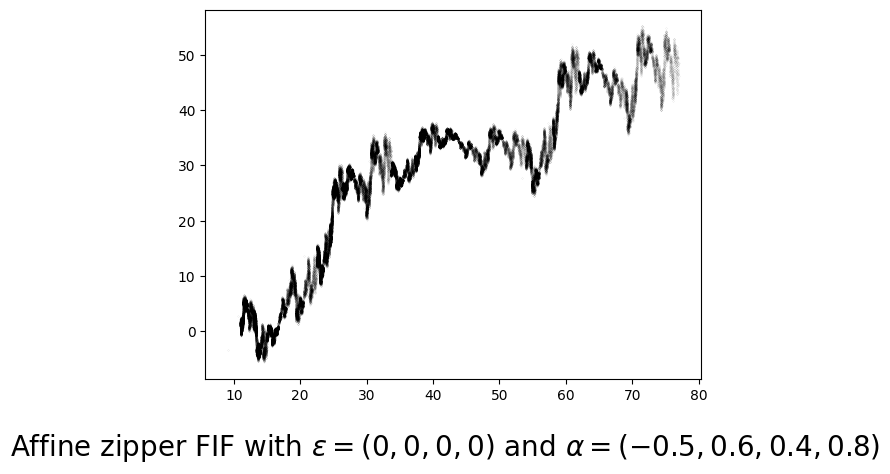

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define alpha functions with specific constants
def alpha0(x): return -0.5
def alpha1(x): return 0.6
def alpha2(x): return 0.4
def alpha3(x): return 0.8

# Data
x = [11, 22.5, 33.7, 54, 77]
y = [1.4, 12.8, 28.9, 31, 44.5]
e = [0, 0, 0, 0]  # Changed epsilon values to zero
alpha = [alpha0, alpha1, alpha2, alpha3]
c, d = [], []  # Coefficients for transformations
n = len(x) - 1

# Calculate d and c values
for i in range(n):
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha[i](x[n]) * y[n])) -
              (x[n] * (y[i + e[i]] - alpha[i](x[0]) * y[0]))) / (x[0] - x[n]))
    c.append(((y[i + 1 - e[i]] - alpha[i](x[n]) * y[n]) -
              (y[i + e[i]] - alpha[i](x[0]) * y[0])) / (x[n] - x[0]))

a, b = [], []

# Calculate a and b values
for i in range(n):
    a.append((x[i + 1 - e[i]] - x[i + e[i]]) / (x[n] - x[0]))
    b.append((x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / (x[n] - x[0]))

# Define transformations as functions in a list
transformations = [
    lambda x, y, i=i: [a[i] * x + b[i], alpha[i](x) * y + c[i] * x + d[i]]
    for i in range(n)
]

# Iterative function to generate points at each depth level
def generate_points(x0, y0, max_depth):
    points = [(x0, y0)]  # Start with the initial point
    all_points_x, all_points_y = [], []

    for depth in range(max_depth):
        new_points = []
        for px, py in points:
            for transform in transformations:
                new_x, new_y = transform(px, py)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        points = new_points  # Update points for the next depth level

    return all_points_x, all_points_y

# Initialize parameters
max_depth = 8       # Depth level
initial_x, initial_y = 0, 0  # Starting point

# Generate points
points_x, points_y = generate_points(initial_x, initial_y, max_depth)

# Plot the points
plt.scatter(points_x, points_y, s=0.001, color="black")
plt.title("")

# Display title below the plot using plt.figtext
plt.figtext(0.5, -0.05, r"Affine zipper FIF with $\epsilon = (0, 0, 0, 0)$ and $\alpha =(-0.5, 0.6, 0.4, 0.8)$",
            ha="center", fontsize=20)

plt.show()


**9**

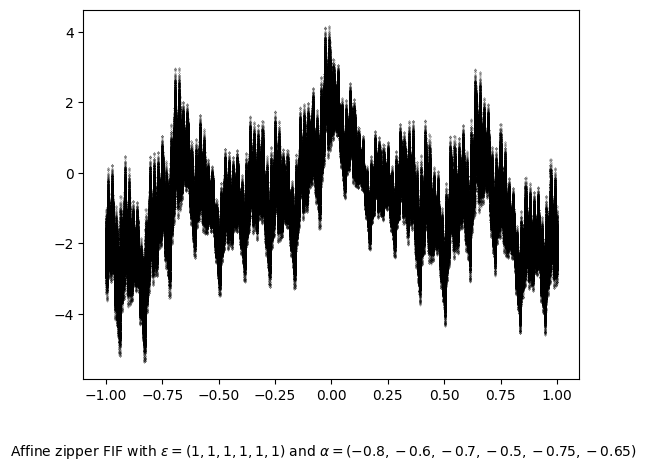

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constant alpha values as scaling functions
def alpha0(x): return -0.8
def alpha1(x): return -0.6
def alpha2(x): return -0.7
def alpha3(x): return -0.5
def alpha4(x): return -0.75
def alpha5(x): return -0.65

# Data
x = [-1, -0.6667, -0.3333, 0, 0.3333, 0.6667, 1]
y = [-2, 0.5, -0.5, 2, -0.5, 0.5, -2]
e = [1, 1, 1, 1, 1, 1]
alpha = [alpha0, alpha1, alpha2, alpha3, alpha4, alpha5]
c, d = [], []
n = len(x) - 1

# Calculate d and c values
for i in range(n):
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha[i](x[n]) * y[n])) -
              (x[n] * (y[i + e[i]] - alpha[i](x[0]) * y[0]))) / (x[0] - x[n]))
    c.append(((y[i + 1 - e[i]] - alpha[i](x[n]) * y[n]) -
              (y[i + e[i]] - alpha[i](x[0]) * y[0])) / (x[n] - x[0]))

a, b = [], []

# Calculate a and b values
for i in range(n):
    a.append((x[i + 1 - e[i]] - x[i + e[i]]) / (x[n] - x[0]))
    b.append((x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / (x[n] - x[0]))

# Define transformations as functions in a list
transformations = [
    lambda x, y, i=i: [a[i] * x + b[i], alpha[i](x) * y + c[i] * x + d[i]]
    for i in range(n)
]

# Iterative function to generate points at each depth level
def generate_points(x0, y0, max_depth):
    points = [(x0, y0)]  # Start with the initial point
    all_points_x, all_points_y = [], []

    for depth in range(max_depth):
        new_points = []
        for px, py in points:
            for transform in transformations:
                new_x, new_y = transform(px, py)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        points = new_points  # Update points for the next depth level

    return all_points_x, all_points_y

# Initialize parameters
max_depth = 8       # Depth level
initial_x, initial_y = 0, 0  # Starting point

# Generate points
points_x, points_y = generate_points(initial_x, initial_y, max_depth)

# Plot the points
plt.scatter(points_x, points_y, s=0.01, color="black")
plt.title("")

# Display title below the plot using plt.figtext
plt.figtext(0.5, -0.05, r"Affine zipper FIF with $\epsilon = (1, 1, 1, 1, 1, 1)$ and $\alpha =(-0.8, -0.6, -0.7, -0.5, -0.75, -0.65)$",
            ha="center", fontsize=10)

plt.show()


**10**

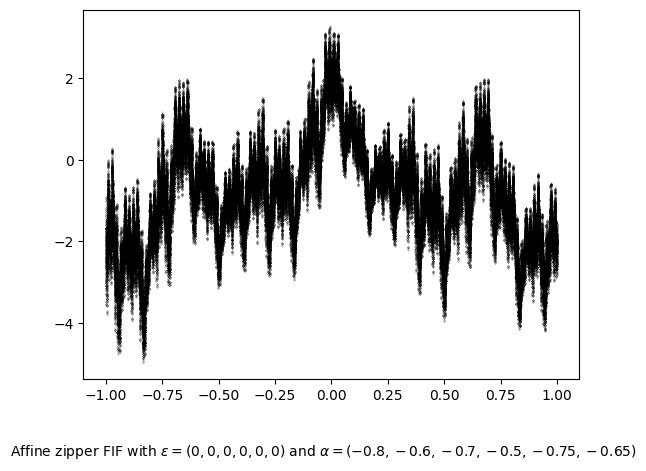

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constant alpha values as scaling functions
def alpha0(x): return -0.8
def alpha1(x): return -0.6
def alpha2(x): return -0.7
def alpha3(x): return -0.5
def alpha4(x): return -0.75
def alpha5(x): return -0.65

# Data
x = [-1, -0.6667, -0.3333, 0, 0.3333, 0.6667, 1]
y = [-2, 0.5, -0.5, 2, -0.5, 0.5, -2]
e = [0, 0, 0, 0, 0, 0]  # Updated e values
alpha = [alpha0, alpha1, alpha2, alpha3, alpha4, alpha5]
c, d = [], []
n = len(x) - 1

# Calculate d and c values
for i in range(n):
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha[i](x[n]) * y[n])) -
              (x[n] * (y[i + e[i]] - alpha[i](x[0]) * y[0]))) / (x[0] - x[n]))
    c.append(((y[i + 1 - e[i]] - alpha[i](x[n]) * y[n]) -
              (y[i + e[i]] - alpha[i](x[0]) * y[0])) / (x[n] - x[0]))

a, b = [], []

# Calculate a and b values
for i in range(n):
    a.append((x[i + 1 - e[i]] - x[i + e[i]]) / (x[n] - x[0]))
    b.append((x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / (x[n] - x[0]))

# Define transformations as functions in a list
transformations = [
    lambda x, y, i=i: [a[i] * x + b[i], alpha[i](x) * y + c[i] * x + d[i]]
    for i in range(n)
]

# Iterative function to generate points at each depth level
def generate_points(x0, y0, max_depth):
    points = [(x0, y0)]  # Start with the initial point
    all_points_x, all_points_y = [], []

    for depth in range(max_depth):
        new_points = []
        for px, py in points:
            for transform in transformations:
                new_x, new_y = transform(px, py)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        points = new_points  # Update points for the next depth level

    return all_points_x, all_points_y

# Initialize parameters
max_depth = 7       # Depth level
initial_x, initial_y = 0, 0  # Starting point

# Generate points
points_x, points_y = generate_points(initial_x, initial_y, max_depth)

# Plot the points
plt.scatter(points_x, points_y, s=0.01, color="black")
plt.title("")

# Display title below the plot using plt.figtext
plt.figtext(0.5, -0.05, r"Affine zipper FIF with $\epsilon = (0, 0, 0, 0, 0, 0)$ and $\alpha =(-0.8, -0.6, -0.7, -0.5, -0.75, -0.65)$",
            ha="center", fontsize=10)

plt.show()


#**wierstrass vs our approximation**

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Weierstrass function
def weierstrass(x, a=0.5, b=3):
    return sum(a**n * np.cos(b**n * np.pi * x) for n in range(100))  # Sum first 100 terms for approximation

# Define constant alpha values as scaling functions
def alpha0(x): return -0.8
def alpha1(x): return -0.6
def alpha2(x): return -0.7
def alpha3(x): return -0.5
def alpha4(x): return -0.75
def alpha5(x): return -0.65

alpha = [alpha0, alpha1, alpha2, alpha3, alpha4, alpha5]


def generate_points(epsilon, x_data, max_depth):
    c, d = [], []
    n = len(x_data) - 1

    # Calculate d and c values
    for i in range(n):
        d.append(((x_data[0] * (y_data[i + 1 - epsilon[i]] - alpha[i](x_data[n]) * y_data[n])) -
                  (x_data[n] * (y_data[i + epsilon[i]] - alpha[i](x_data[0]) * y_data[0]))) / (x_data[0] - x_data[n]))
        c.append(((y_data[i + 1 - epsilon[i]] - alpha[i](x_data[n]) * y_data[n]) -
                  (y_data[i + epsilon[i]] - alpha[i](x_data[0]) * y_data[0])) / (x_data[n] - x_data[0]))

    a, b = [], []

    # Calculate a and b values
    for i in range(n):
        a.append((x_data[i + 1 - epsilon[i]] - x_data[i + epsilon[i]]) / (x_data[n] - x_data[0]))
        b.append((x_data[n] * x_data[i + epsilon[i]] - x_data[0] * x_data[i + 1 - epsilon[i]]) / (x_data[n] - x_data[0]))

    # Define transformations as functions in a list
    transformations = [
        lambda x, y, i=i: [a[i] * x + b[i], alpha[i](x) * y + c[i] * x + d[i]]
        for i in range(n)
    ]

    # Iterative function to generate points at each depth level
    points = [(0, 0)]  # Start with the initial point
    all_points_x, all_points_y = [], []

    for depth in range(max_depth):
        new_points = []
        for px, py in points:
            for transform in transformations:
                new_x, new_y = transform(px, py)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        points = new_points

    return all_points_x, all_points_y

# Function to calculate RMSE
def calculate_rmse(epsilon, x_data, max_depth):

    points_x, points_y = generate_points(epsilon, x_data, max_depth)


    weierstrass_values = [weierstrass(x) for x in points_x]


    rmse = np.sqrt(np.mean((np.array(weierstrass_values) - np.array(points_y)) ** 2))
    return rmse# Data
y_data = [-2, 0.5, -0.5, 2, -0.5, 0.5, -2]
x_data = [-1, -0.6667, -0.3333, 0, 0.3333, 0.6667, 1]

# Main loop to get epsilon from user and calculate RMSE
def main():
    # User input for epsilon
    epsilon_input = input("Enter epsilon values separated by commas (e.g., 1,1,1,1,1,1): ")
    epsilon = list(map(int, epsilon_input.split(",")))

    max_depth = 4  # Depth level for point generation
    rmse = calculate_rmse(epsilon, x_data, max_depth)

    print(f"Root Mean Square Error (RMSE) for epsilon {epsilon}: {rmse}")

# Run the main function
main()
#1,1,1,1,1,1
#1,0,1,1,1,1
#1,1,0,1,1,1
#1,1,1,0,1,1
#1,1,1,1,0,1
#1,1,1,1,1,0
#0,0,0,0,0,0


Enter epsilon values separated by commas (e.g., 1,1,1,1,1,1): 1,1,1,1,1,1
Root Mean Square Error (RMSE) for epsilon [1, 1, 1, 1, 1, 1]: 1.0777724370717747


**11)**

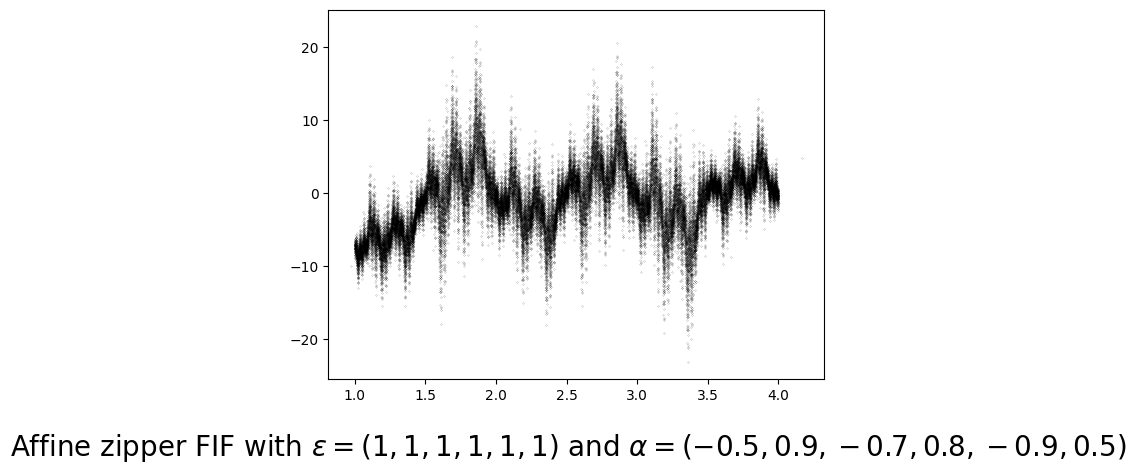

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define alpha functions
def alpha0(x): return -0.5
def alpha1(x): return 0.9
def alpha2(x): return -0.7
def alpha3(x): return 0.8
def alpha4(x): return -0.9
def alpha5(x): return 0.5

# Data
x = [1, 1.5, 2, 2.5, 3, 3.5, 4]
y = [-7.2986, -0.6947, -0.1223, -0.0267, -0.0030, -0.0002, 0]
e = [1, 1, 1, 1, 1, 1]  # e values as specified
alpha = [alpha0, alpha1, alpha2, alpha3, alpha4, alpha5]
c, d = [], []
n = len(x) - 1

# Calculate d and c values
for i in range(n):
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha[i](x[n]) * y[n])) -
               (x[n] * (y[i + e[i]] - alpha[i](x[0]) * y[0]))) /
              (x[0] - x[n]))

    c.append(((y[i + 1 - e[i]] - alpha[i](x[n]) * y[n]) -
               (y[i + e[i]] - alpha[i](x[0]) * y[0])) /
              (x[n] - x[0]))

a, b = [], []

# Calculate a and b values
for i in range(n):
    a.append((x[i + 1 - e[i]] - x[i + e[i]]) / (x[n] - x[0]))
    b.append((x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / (x[n] - x[0]))

# Define transformations as functions in a list
transformations = [
    lambda x, y, i=i: [a[i] * x + b[i], alpha[i](x) * y + c[i] * x + d[i]]
    for i in range(n)
]

# Iterative function to generate points at each depth level
def generate_points(x0, y0, max_depth):
    points = [(x0, y0)]  # Start with the initial point
    all_points_x, all_points_y = [], []

    for depth in range(max_depth):
        new_points = []
        for px, py in points:
            for transform in transformations:
                new_x, new_y = transform(px, py)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        points = new_points  # Update points for the next depth level

    return all_points_x, all_points_y

# Initialize parameters
max_depth = 6       # Depth level
initial_x, initial_y = 0, 0  # Starting point

# Generate points
points_x, points_y = generate_points(initial_x, initial_y, max_depth)

# Plot the points
plt.scatter(points_x, points_y, s=0.01, color='black')
plt.title("")

# Display title below the plot using plt.figtext
plt.figtext(0.5, -0.05, r"Affine zipper FIF with $\epsilon = (1,1,1,1,1,1)$ and $\alpha =(-0.5, 0.9, -0.7, 0.8,-0.9,0.5)$",
            ha="center", fontsize=20)

plt.show()


**12)**

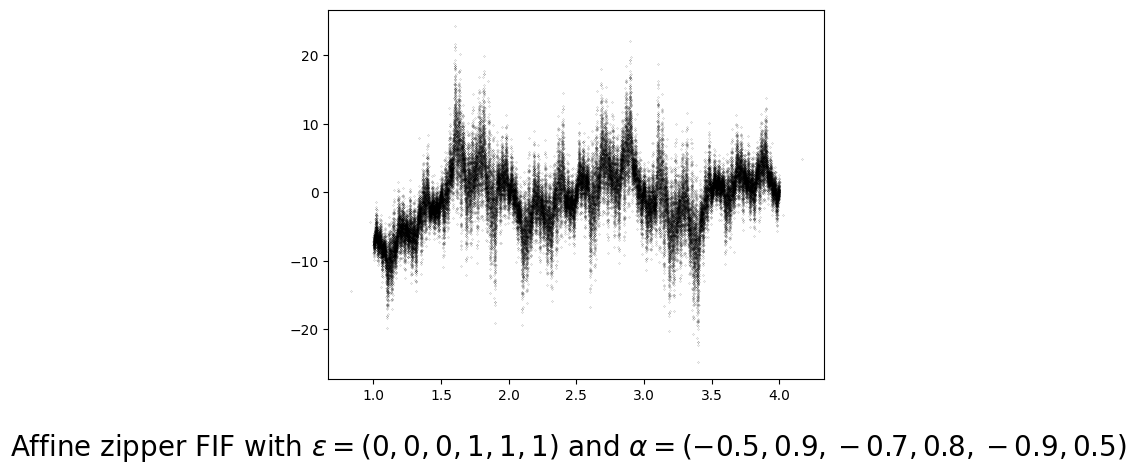

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define alpha functions
def alpha0(x): return -0.5
def alpha1(x): return 0.9
def alpha2(x): return -0.7
def alpha3(x): return 0.8
def alpha4(x): return -0.9
def alpha5(x): return 0.5

# Data
x = [1, 1.5, 2, 2.5, 3, 3.5, 4]
y = [-7.2986, -0.6947, -0.1223, -0.0267, -0.0030, -0.0002, 0]
e = [0, 0, 0, 1, 1, 1]  # Updated e values
alpha = [alpha0, alpha1, alpha2, alpha3, alpha4, alpha5]
c, d = [], []
n = len(x) - 1

# Calculate d and c values
for i in range(n):
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha[i](x[n]) * y[n])) -
               (x[n] * (y[i + e[i]] - alpha[i](x[0]) * y[0]))) /
              (x[0] - x[n]))

    c.append(((y[i + 1 - e[i]] - alpha[i](x[n]) * y[n]) -
               (y[i + e[i]] - alpha[i](x[0]) * y[0])) /
              (x[n] - x[0]))

a, b = [], []

# Calculate a and b values
for i in range(n):
    a.append((x[i + 1 - e[i]] - x[i + e[i]]) / (x[n] - x[0]))
    b.append((x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / (x[n] - x[0]))

# Define transformations as functions in a list
transformations = [
    lambda x, y, i=i: [a[i] * x + b[i], alpha[i](x) * y + c[i] * x + d[i]]
    for i in range(n)
]

# Iterative function to generate points at each depth level
def generate_points(x0, y0, max_depth):
    points = [(x0, y0)]  # Start with the initial point
    all_points_x, all_points_y = [], []

    for depth in range(max_depth):
        new_points = []
        for px, py in points:
            for transform in transformations:
                new_x, new_y = transform(px, py)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        points = new_points  # Update points for the next depth level

    return all_points_x, all_points_y

# Initialize parameters
max_depth = 6       # Depth level
initial_x, initial_y = 0, 0  # Starting point

# Generate points
points_x, points_y = generate_points(initial_x, initial_y, max_depth)

# Plot the points
plt.scatter(points_x, points_y, s=0.01, color='black')
plt.title("")

# Display title below the plot using plt.figtext
plt.figtext(0.5, -0.05, r"Affine zipper FIF with $\epsilon = (0,0,0,1,1,1)$ and $\alpha =(-0.5, 0.9, -0.7, 0.8,-0.9,0.5)$",
            ha="center", fontsize=20)

plt.show()
